In [2]:
#import modules
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import glob




In [6]:
#function to convert xml annotations to csv files
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text),
                     member[0].text
                     )
            xml_list.append(value)
    column_name = ['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'class']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

#function to draw bounding boxes given image name
def draw_boxes(image_name):
    selected_value = bounding_box_labels[bounding_box_labels.filename == image_name]
    print(selected_value)
    img = cv2.imread('images/bounding_boxes/{}'.format(image_name))
    for index, row in selected_value.iterrows():
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

In [7]:
#save xml annotations to csv
annotation_path = './annotations'
xml_df = xml_to_csv(annotation_path)
xml_df.to_csv('./data/tree_bounding_box_labels.csv', index=None)
print('Successfully converted xml to csv.')




Successfully converted xml to csv.


## Visualize some bounding boxes


        filename  width  height class  xmin  ymin  xmax  ymax
132  tree-16.jpg   1000     708  tree   526    22   825   587


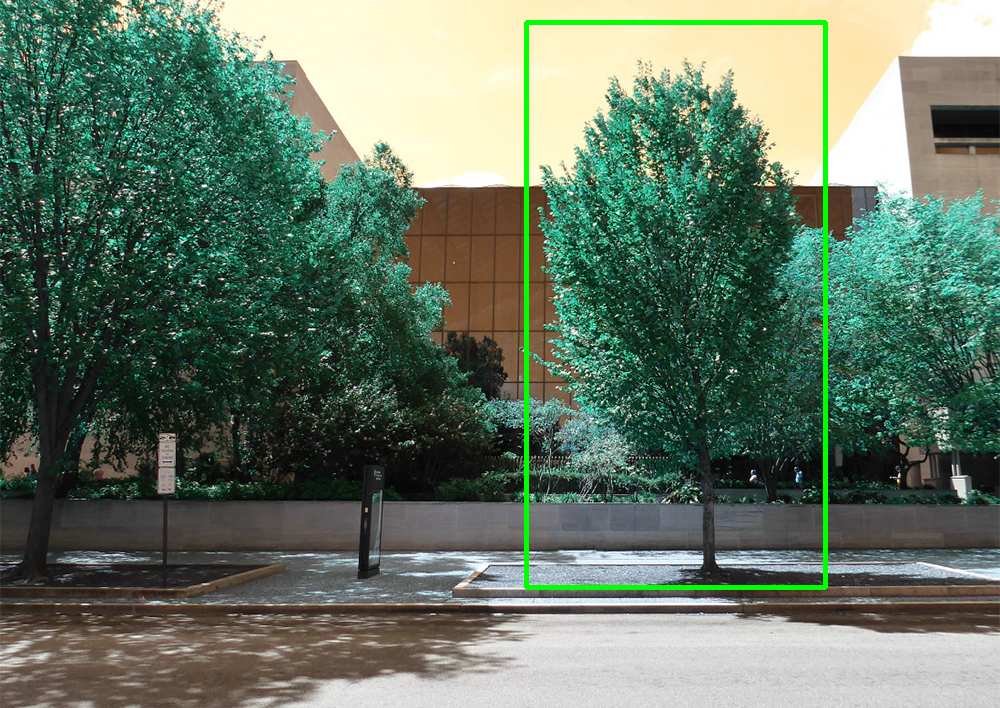

In [35]:
bounding_box_labels = pd.read_csv('./data/tree_bounding_box_labels.csv')

Image.fromarray(draw_boxes('tree-16.jpg'))


       filename  width  height class  xmin  ymin  xmax  ymax
43  tree-51.jpg    448     336  tree    30    13   199   229


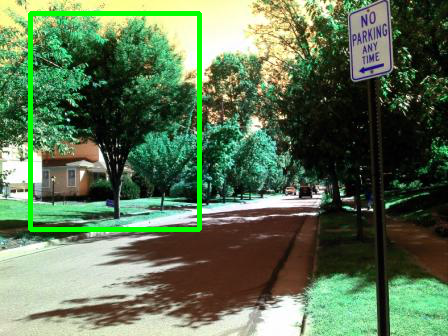

In [39]:
Image.fromarray(draw_boxes('tree-51.jpg'))


        filename  width  height class  xmin  ymin  xmax  ymax
124  tree-29.jpg    250     333  tree   113     1   231   244


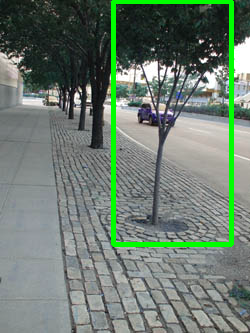

In [46]:
Image.fromarray(draw_boxes('tree-29.jpg'))


## keras yolov2

## Initialization

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
import imgaug as ia
from imgaug import augmenters as iaa
from tqdm import tqdm_notebook
import numpy as np
import json
import pickle
import os, cv2
from preprocessing import parse_annotation, BatchGenerator
from utils import WeightReader, decode_netout, draw_boxes

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

%matplotlib inline